# SpaceNet7 Dataset

## Intro

SpaceNet7 [(Van Etten et al. 2021)](https://openaccess.thecvf.com/content/CVPR2021/papers/Van_Etten_The_Multi-Temporal_Urban_Development_SpaceNet_Dataset_CVPR_2021_paper.pdf) is a multi-temporal building footprint tracking dataset using time-series Planet satellite imagery. The dataset provides monthly time series of high-resolution optical imagery with building footprint annotations, for building detection and tracking over time. 

## Dataset Characteristics

- **Modalities**: 
  - Planet satellite imagery
- **Spatial Resolution**: 4m (Planet PlanetScope)
- **Spectral Bands**: 
  - RGB: 3 channels (Red, Green, Blue)
- **Image Dimensions**: 512x512 pixels per patch
- **Labels**:
  - Binary segmentation (building vs. non-building)
  - Monthly building status tracking
- **Geographic Distribution**: Global coverage (100+ cities)

## Dataset Setup and Initialization

In [1]:
from pathlib import Path
from geobench_v2.datamodules import GeoBenchSpaceNet7DataModule

# Setup paths
PROJECT_ROOT = Path("../../")

# Initialize datamodule
datamodule = GeoBenchSpaceNet7DataModule(
    img_size=512,
    batch_size=8,
    num_workers=4,
    root=PROJECT_ROOT / "data" / "spacenet7",
    download=True
)
datamodule.setup("fit")
datamodule.setup("test")

print("SpaceNet7 datamodule initialized successfully!")
print(f"Training samples: {len(datamodule.train_dataset)}")
print(f"Validation samples: {len(datamodule.val_dataset)}")
print(f"Test samples: {len(datamodule.test_dataset)}")

Initializing normalizer from class: ZScoreNormalizer
Initializing normalizer from class: ZScoreNormalizer
Initializing normalizer from class: ZScoreNormalizer
SpaceNet7 datamodule initialized successfully!
Training samples: 3888
Validation samples: 652
Test samples: 1152


## Geographic Distribution Visualization

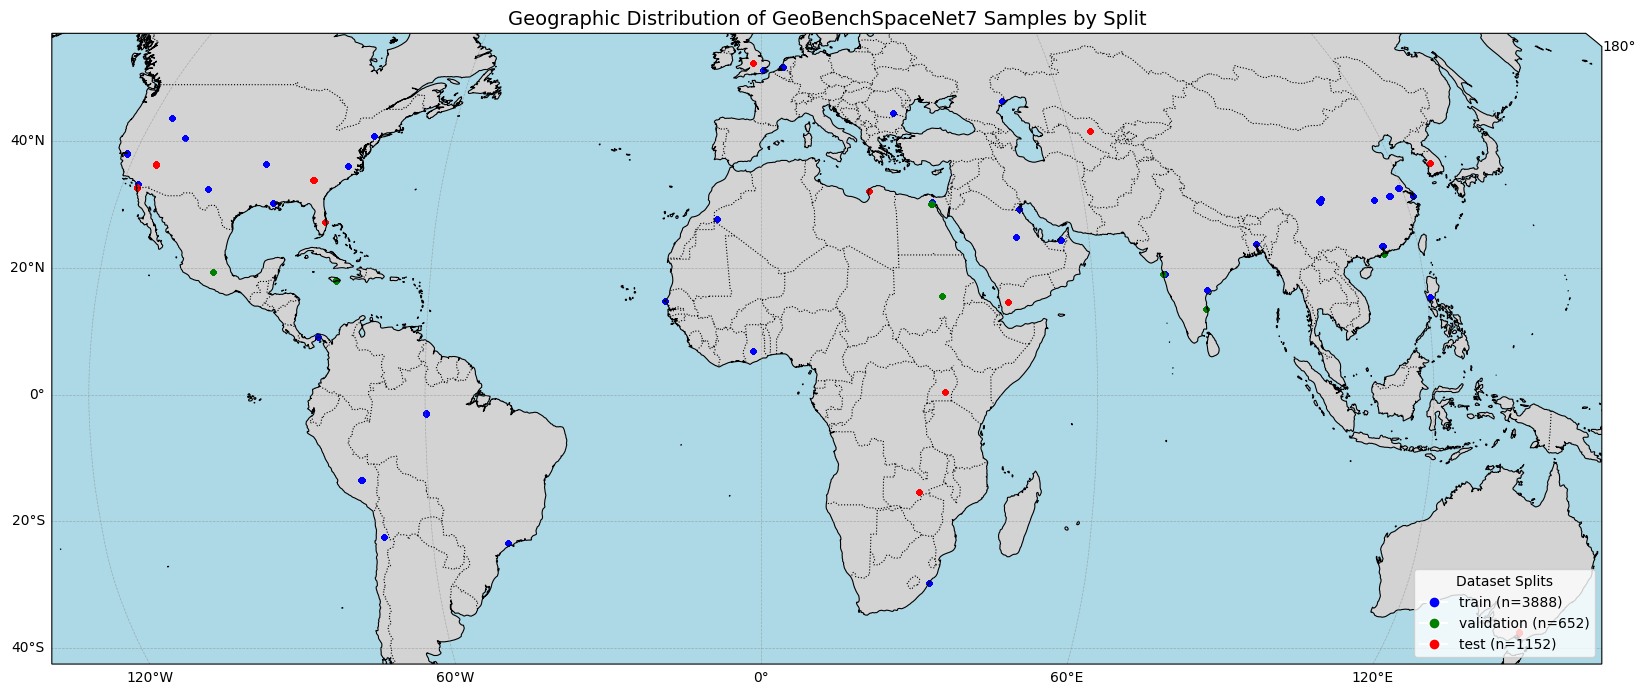

In [2]:
geo_fig = datamodule.visualize_geospatial_distribution()

## Sample Data Visualization

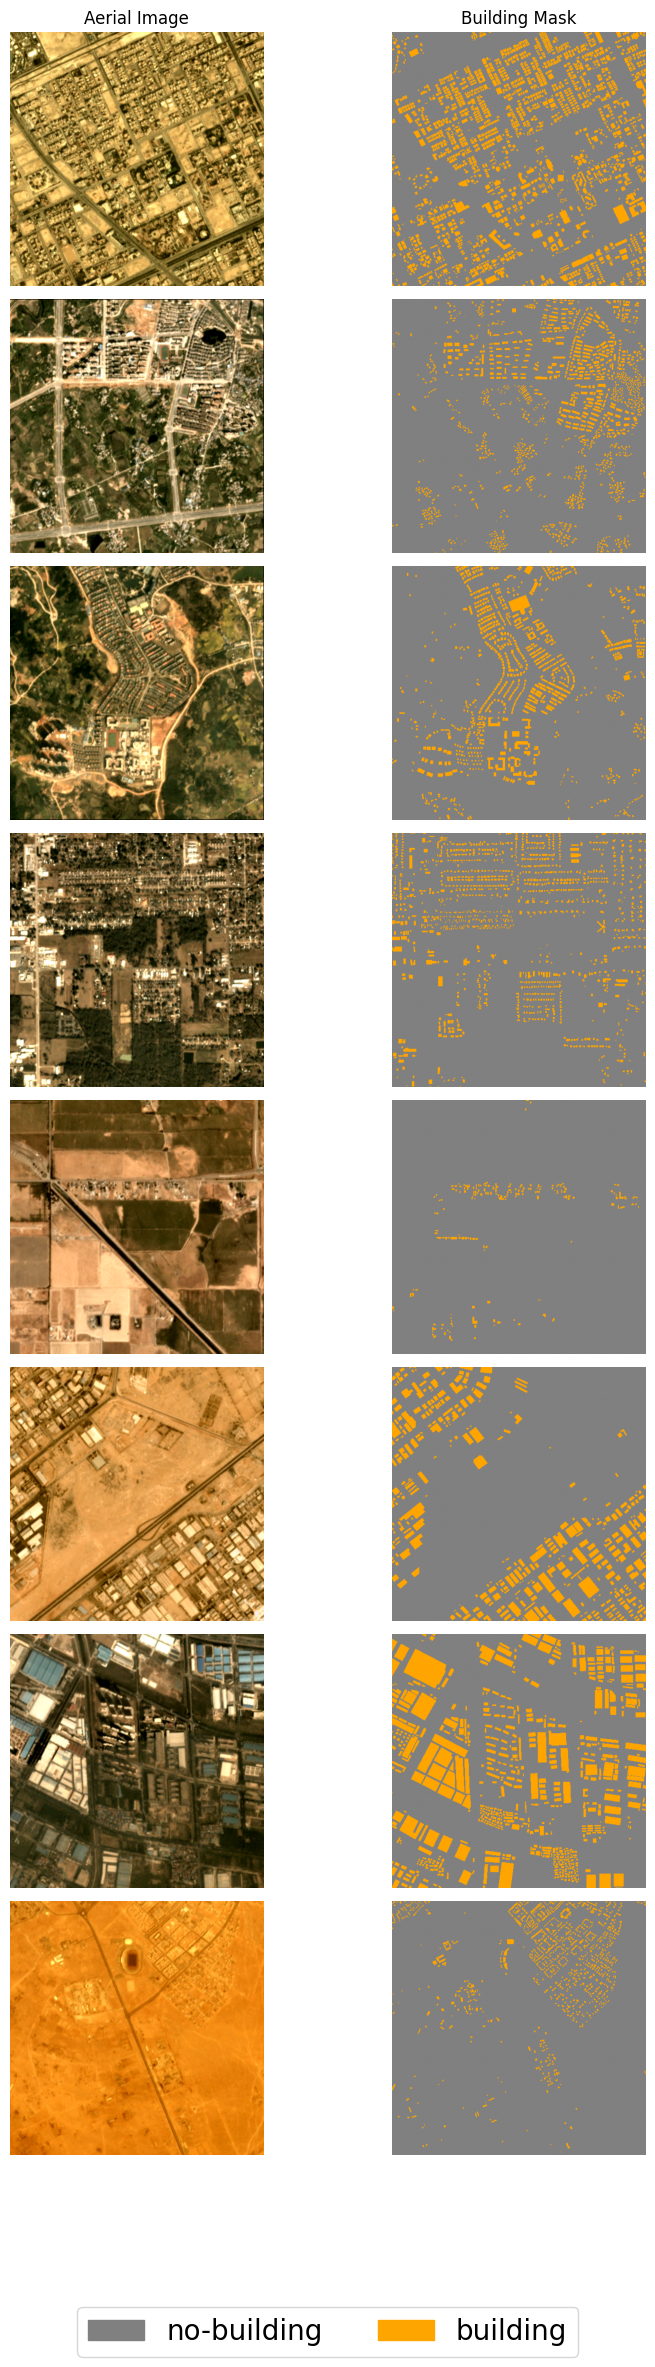

In [3]:
fig, batch = datamodule.visualize_batch()

## GeoBenchV2 Processing Pipeline

### Preprocessing Steps

1. **Patch Generation**
   - The original 1024x1024px tiles are separated into 4 512x512px patches

2. **Split Generation**:
   - train/val/test splits were generated by separating the different areas of interests (AOI) so that the sets are disjoint given the location

## References

1. Van Etten, A., Hogan, D., Martinez-Manso, J., Shermeyer, J., Weir, N., & Lewis, R. (2021). The multi-temporal urban development SpaceNet dataset. *Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition*, 6398-6407..